In [ ]:
import pandas as pd
df = pd.read_excel("/content/Sample - Superstore.xls")

In [ ]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [ ]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df["Order Date"] = pd.to_datetime(df["Order Date"])

current_date = df["Order Date"].max()

recency_data = df.groupby("Customer ID")["Order Date"].max().reset_index()

recency_data["Recency"] = (current_date - recency_data["Order Date"] ).dt.days

print(recency_data[["Customer ID","Recency"]].head())

  Customer ID  Recency
0    AA-10315      184
1    AA-10375       19
2    AA-10480      259
3    AA-10645       55
4    AB-10015      415


In [ ]:
frequency_data = df.groupby("Customer ID")["Order Date"].nunique().reset_index()
frequency_data
frequency_data.columns = ["Customer ID","Frequency"]

print(frequency_data.head())

  Customer ID  Frequency
0    AA-10315          5
1    AA-10375          9
2    AA-10480          4
3    AA-10645          6
4    AB-10015          3


In [ ]:
df["TotalPrice"] = df["Quantity"] * df["Sales"]

In [ ]:
monetary_data = df.groupby("Customer ID")["TotalPrice"].sum().reset_index()
monetary_data.columns = ["Customer ID","Monetary"]
print(monetary_data.head())

  Customer ID   Monetary
0    AA-10315  16073.344
1    AA-10375   2734.830
2    AA-10480   5493.936
3    AA-10645  22927.855
4    AB-10015   1984.480


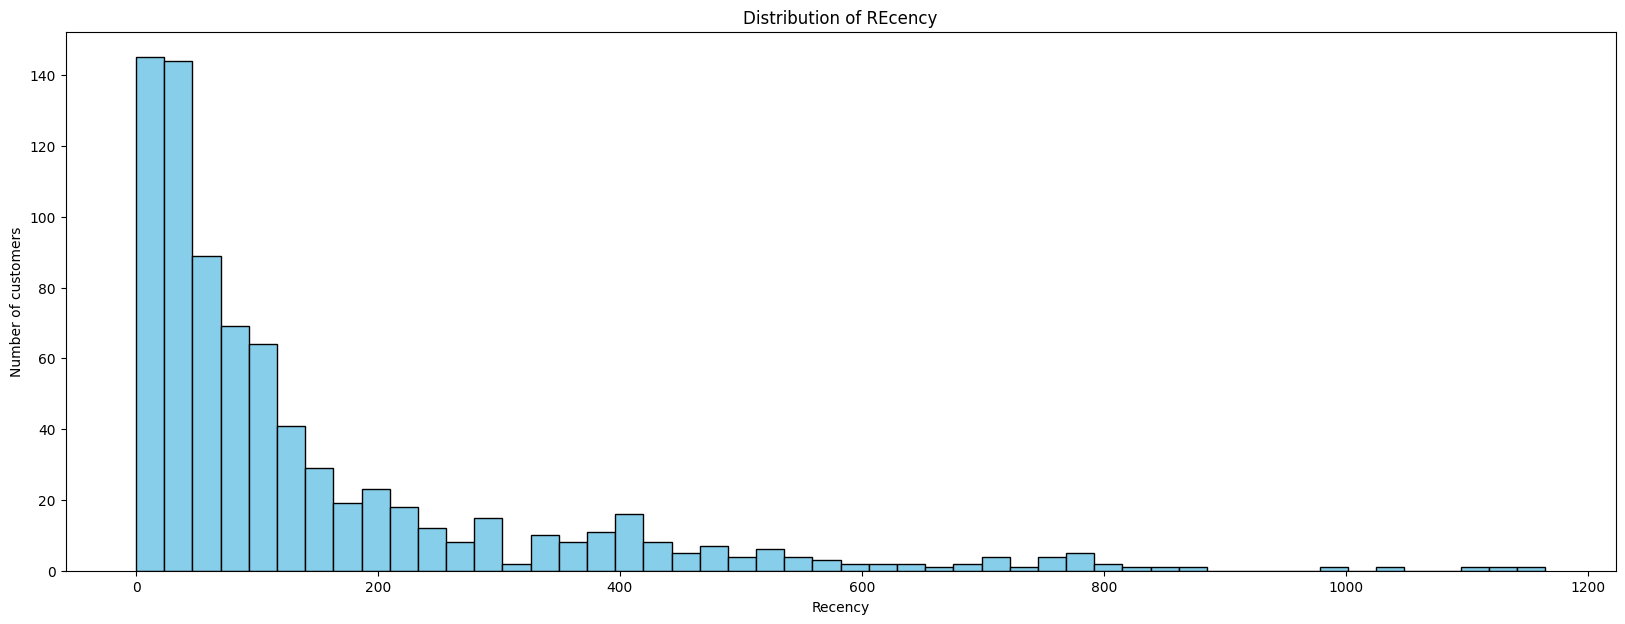

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (20,7))
plt.hist(recency_data["Recency"],bins = 50,color = "skyblue",edgecolor = "black")
plt.title("Distribution of REcency")
plt.xlabel("Recency")
plt.ylabel("Number of customers")
plt.show()

In [ ]:
from sklearn.cluster import KMeans
rfm_data = pd.merge(recency_data, frequency_data, on = "Customer ID")
rfm_data = pd.merge(rfm_data, monetary_data, on = "Customer ID")
print(rfm_data)

    Customer ID Order Date  Recency  Frequency   Monetary
0      AA-10315 2017-06-29      184          5  16073.344
1      AA-10375 2017-12-11       19          9   2734.830
2      AA-10480 2017-04-15      259          4   5493.936
3      AA-10645 2017-11-05       55          6  22927.855
4      AB-10015 2016-11-10      415          3   1984.480
..          ...        ...      ...        ...        ...
788    XP-21865 2017-11-17       43         11   8676.214
789    YC-21895 2017-12-26        4          5  27208.926
790    YS-21880 2017-12-21        9          8  46478.992
791    ZC-21910 2017-11-06       54         13  40212.889
792    ZD-21925 2017-06-11      202          5   6492.448

[793 rows x 5 columns]


In [ ]:
rfm_data["R_rank"] = rfm_data["Recency"].rank(ascending = False)
rfm_data["F_rank"] = rfm_data["Frequency"].rank(ascending = True)
rfm_data["M_rank"] = rfm_data["Monetary"].rank(ascending = True)

#Normalisation
rfm_data["R_rank_norm"] = (rfm_data["R_rank"]/rfm_data["R_rank"].max())*100
rfm_data["F_rank_norm"] = (rfm_data["F_rank"]/rfm_data["F_rank"].max())*100
rfm_data["M_rank_norm"] = (rfm_data["M_rank"]/rfm_data["M_rank"].max())*100

In [ ]:
rfm_data.drop(columns = ["Order Date","R_rank","F_rank","M_rank"],inplace = True)
rfm_data.head()

,Customer ID,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,AA-10315,184,5,16073.344,24.699937,33.354351,70.239596
1,AA-10375,19,9,2734.830,86.607707,84.930643,14.249685
2,AA-10480,259,4,5493.936,17.687934,18.726356,29.003783
3,AA-10645,55,6,22927.855,58.559697,48.486759,81.210593
4,AB-10015,415,3,1984.480,9.033481,9.205549,10.466583


In [ ]:
rfm_data["RFM_Score"] = 0.15*rfm_data["R_rank_norm"] +0.28 * rfm_data["F_rank_norm"] + 0.57 * rfm_data["M_rank_norm"]
rfm_data["RFM_Score"]*=0.05
rfm_data = rfm_data.round(2)
rfm_data[["Customer ID","RFM_Score"]].head(7)

,Customer ID,RFM_Score
0,AA-10315,2.65
1,AA-10375,2.24
2,AA-10480,1.22
3,AA-10645,3.43
4,AB-10015,0.50
5,AB-10060,4.12
6,AB-10105,4.64


In [ ]:
import numpy as np
rfm_data["Customer_segment"] = np.where(rfm_data["RFM_Score"] > 4.5,
                                        "Top Customers",
                                        (np.where(rfm_data["RFM_Score"] > 4,
                                        "High Value Customers",
                                         (np.where(rfm_data["RFM_Score"] > 3,
                                        "Medium Value Customers",
                                          (np.where(rfm_data["RFM_Score"] > 1.5,
                                        "Low Value Customers", "Lost Customers"
                                         )))))))
rfm_data[["Customer ID","RFM_Score","Customer_segment"]].head(20)

,Customer ID,RFM_Score,Customer_segment
0,AA-10315,2.65,Low Value Customers
1,AA-10375,2.24,Low Value Customers
2,AA-10480,1.22,Lost Customers
3,AA-10645,3.43,Medium Value Customers
4,AB-10015,0.50,Lost Customers
5,AB-10060,4.12,High Value Customers
6,AB-10105,4.64,Top Customers
7,AB-10150,1.42,Lost Customers
8,AB-10165,2.17,Low Value Customers
9,AB-10255,1.76,Low Value Customers


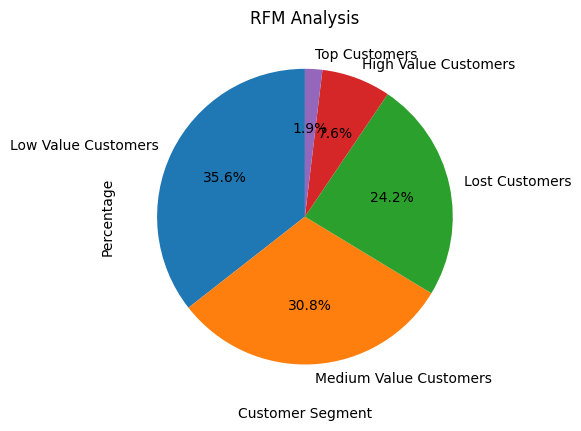

In [ ]:
import matplotlib.pyplot as plt
rfm_data['Customer_segment'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.xlabel('Customer Segment')
plt.ylabel('Percentage')
plt.title('RFM Analysis')
plt.show()